# MNIST dataset multi-layer perceptron
* mnsit is handwriten character data built into tensorflow and used for testing. The data is stored in the from of an array.

In [1]:
import tensorflow as tf

/Users/fabian/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets("/tmp/data",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

In [5]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [8]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
mnist.train.images.shape

(55000, 784)

In [10]:
mnist.train.images[2].shape

(784,)

In [13]:
sample = mnist.train.images[2].reshape(28,28)
#reshape to original size to see the actual data values which is the darkeness of the pixel values

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

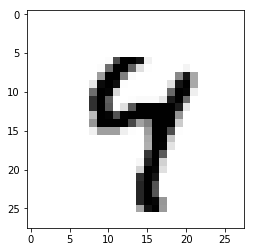

In [18]:
#Example of what the image actually looks like.
plt.imshow(sample,cmap='Greys');

### I wil develop a multi-layer percepton in TensorFlow to take in pixel information and correctly classify it to the number represented in the mnsit image.
#### Define Parameters
* Learning Rate - How quickly to adjust the cost function.
* Training Epochs - How many training cycles to go through
* Batch Size - Size of the 'batches' of training data.


In [19]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [20]:
#network Parameters
n_classes = 10 
n_samples = mnist.train.num_examples

In [21]:
#this is the actual input shape which is the flattened 28*28
n_input = 784

In [22]:
#stored in 8bit color storage
n_hidden_1 = 256
n_hidden_2 = 256

In [34]:
#multilayer perceptron, uses rectifier function
def multilayer_perceptron(x,weight,biases):
    """
    x: placeholder for data input
    weights: dict of weights
    biases: dict of bias values
    """
    
    #First hidden Layer with RELU Activation
    # X * W + B
    layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    # RELU(X * W + B) => f(x) = max(0,x)
    layer_1 = tf.nn.relu(layer_1)
    
    #2nd hidden layer
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    #last output layer
    out_layer = tf.matmul(layer_2,weights['out']) + biases['out']
    
    return out_layer
    
    

In [29]:
weights = {
    #randomly initialized normal matrix for hidden layer 1,n_input = 784rows and n_hidden_1 = 256cols
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    #second layer takes in 1st layer
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    # output will be: [0,0,0,0,0,1,0,0,0,0] for the number 6 
    'out': tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

In [30]:
biases = {
    #vlaues added to weights multipled by the data in perceptron
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [31]:
# set 2 placeholders for x,y; (type,shape)
x = tf.placeholder('float',[None,n_input])

In [32]:
y = tf.placeholder('float', [None,n_classes])

In [35]:
pred = multilayer_perceptron(x,weights,biases)

In [38]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

## Information on the data out

In [41]:
t = mnist.train.next_batch(1) 
#samples of the training data

In [42]:
Xsamp,ysamp = t

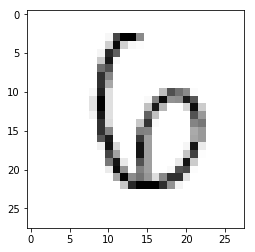

In [44]:
plt.imshow(Xsamp.reshape(28,28),cmap='Greys')

In [46]:
ysamp
#the 6th position in the array is true for 6

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

# Run the Session

In [47]:
sess = tf.InteractiveSession()

In [50]:
#init = tf.initialize_all_variables() -> deprecated
init = tf.global_variables_initializer()

In [51]:
sess.run(init)

In [68]:
#15 loops
for epoch in range(training_epochs):
    
    #start with cost
    avg_cost = 0.0
    
    total_batch = int(n_samples/batch_size)
    
    for i in range(total_batch):
        
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        _,c = sess.run([optimizer,cost],feed_dict={x:batch_x, y:batch_y})

        
        avg_cost += c/total_batch
        
    print("Epoch: {} cost {:.4f}".format(epoch+1,avg_cost))

print("Model has completed {} Epochs of training".format(training_epochs))

Epoch: 1 cost 0.5251
Epoch: 2 cost 0.4853
Epoch: 3 cost 0.4894
Epoch: 4 cost 0.4543
Epoch: 5 cost 0.4063
Epoch: 6 cost 0.3894
Epoch: 7 cost 0.3789
Epoch: 8 cost 0.3913
Epoch: 9 cost 0.2934
Epoch: 10 cost 0.2966
Epoch: 11 cost 0.2751
Epoch: 12 cost 0.2737
Epoch: 13 cost 0.2673
Epoch: 14 cost 0.2685
Epoch: 15 cost 0.2434
Model has completed 15 Epochs of training


# Model Evaluation

In [56]:
correct_predictions = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))

In [57]:
print(correct_predictions[0])

Tensor("strided_slice:0", shape=(), dtype=bool)


In [58]:
correct_predictions = tf.cast(correct_predictions,'float')

In [59]:
print(correct_predictions[0])

Tensor("strided_slice_1:0", shape=(), dtype=float32)


In [60]:
accuracy = tf.reduce_mean(correct_predictions)

In [62]:
mnist.test.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [64]:
#mnist.test.images[0]

In [66]:
accuracy.eval({x:mnist.test.images,y:mnist.test.labels})

0.9498

### 95% accuracy on 15  epochs is ok. this would certainly improve with more epochs.